# t-test example

The following code is a simple t-test using SciPy.

In [1]:
from scipy import stats

Example data: replace these with your actual measurements

In [2]:
control_group = [0.1, 0.2, 0.15, 0.18, 0.16]
resistant_group = [0.25, 0.3, 0.28, 0.29, 0.27]

Step 2: Check for normality (Optional)
Perform Shapiro-Wilk test for normality on both groups

In [3]:
stat, p_control_normality = stats.shapiro(control_group)
print("Control Group Normality, p-value:", p_control_normality)
stat, p_resistant_normality = stats.shapiro(resistant_group)
print("Resistant Group Normality, p-value:", p_resistant_normality)

Control Group Normality, p-value: 0.7827625813922048
Resistant Group Normality, p-value: 0.9276364233495382


For Shapiro-Wilk, null hypothesis is that the sample comes from a normally distributed population.
In other words, a normal distribution would accept the null hypothesis.
If p-values are greater than 0.05, we can assume normality

Step 3: Perform Independent Samples t-test

Step 4: Interpret the Result
if you perform a two-sample location test, such as Student's t-test or Welch's
t-test, and obtain a p-value less than 0.05, it generally means you have
statistically significant evidence to reject the null hypothesis that the
means of the two populations are equal. This threshold of 0.05 is a conventional
criterion, often referred to as the alpha level, and it indicates a 5% risk of
concluding that a difference exists when there actually is no true difference
(Type I error).

In [4]:
if p_control_normality > 0.05 and p_resistant_normality > 0.05:
    print("\nBoth groups follow a normal distribution. Proceeding with t-test...\n")
    t_stat, p_value = stats.ttest_ind(control_group, resistant_group)
    print("t-statistic:", t_stat)
    print("p-value:     ", p_value)

    if p_value < 0.05:
        print("\nThere is a statistically significant difference between the groups.")
    else:
        print("\nThere is no statistically significant difference between the groups.")
else:
    print(
        "\nNormality assumption not met. Consider using a non-parametric test instead."
    )


Both groups follow a normal distribution. Proceeding with t-test...

t-statistic: -6.342197070980279
p-value:      0.00022246338662320464

There is a statistically significant difference between the groups.


Below is an example for making a volcano plot that is common in transcriptomics studies.
Dots colored in red are the genes that are statistically significant.

We often use $log_2$ instead of $log_{10}$ because

-   Log2: A 1-unit change in Log2 scale indicates a twofold increase or decrease.
-   Log10: A 1-unit change in Log10 scale indicates a tenfold increase or decrease.
-   Natural Log (ln): A 1-unit change in ln scale is based on the natural exponential function (e).

Remember that our gene expression data CSV file is already in Log10.

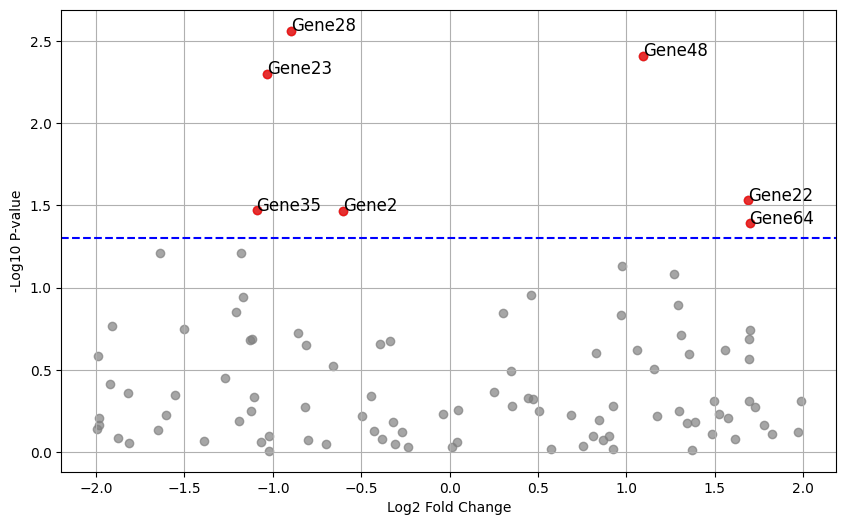

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (these data will not look like yours as they are random).
log2FC = np.random.uniform(-2, 2, 100)  # Log2 fold changes of 100 genes
p_values = np.random.uniform(0, 1, 100)  # P-values of 100 genes
gene_names = [f"Gene{i}" for i in range(1, 101)]  # Gene labels

# Compute -log10 of p-values
neg_log10_p_values = -np.log10(p_values)

# Set significance thresholds
significance_threshold = -np.log10(0.05)  # Corresponding to p-value of 0.05

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(log2FC, neg_log10_p_values, color="grey", alpha=0.7)

# Highlight significant points
significant = neg_log10_p_values > significance_threshold
# Highlight and label significant points
for i, (fc, pval, gene) in enumerate(zip(log2FC, neg_log10_p_values, gene_names)):
    if pval > significance_threshold:
        plt.scatter(fc, pval, color="red", alpha=0.7)
        plt.text(fc, pval, gene, fontsize=12)

# Add horizontal line for p-value threshold
plt.axhline(y=significance_threshold, color="blue", linestyle="--")

# Add vertical lines for fold change thresholds

plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.grid(True)
plt.show()